In [1]:
import keras
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-10-10 17:06:10.827656: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 17:06:10.831799: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 17:06:10.843502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 17:06:10.862892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 17:06:10.868389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 17:06:10.883905: I tensorflow/core/platform/cpu_feature_gu

# Regression

## Data

In [2]:
from sklearn.datasets import make_regression

data = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

x = data[0]
y = data[1]

print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (1000, 5)
y shape:  (1000,)


### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Scaling Data

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print("x_train shape: ", x_train.shape, "y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape, "y_test shape", y_test.shape)

x_train shape:  (800, 5) y_train shape:  (800,)
x_test shape:  (200, 5) y_test shape (200,)


## Model

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()

# input layer:
model.add(Input((5,)))
# dense 1:
model.add(Dense(units=16, activation="relu"))
# dense 2:
model.add(Dense(units=16, activation="relu"))
# output layer:
model.add(Dense(units=1, activation="linear"))

model.summary()

I0000 00:00:1728567374.900080   91858 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-10 17:06:14.901065: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [6]:
loss = tf.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer)

model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
15/15 - 1s - 81ms/step - loss: 4004.7517 - val_loss: 5137.0923
Epoch 2/100
15/15 - 0s - 12ms/step - loss: 3989.4695 - val_loss: 5120.1709
Epoch 3/100
15/15 - 0s - 10ms/step - loss: 3971.3459 - val_loss: 5098.3789
Epoch 4/100
15/15 - 0s - 8ms/step - loss: 3948.1770 - val_loss: 5069.9155
Epoch 5/100
15/15 - 0s - 5ms/step - loss: 3918.2834 - val_loss: 5033.3149
Epoch 6/100
15/15 - 0s - 9ms/step - loss: 3880.8264 - val_loss: 4984.1782
Epoch 7/100
15/15 - 0s - 5ms/step - loss: 3833.1499 - val_loss: 4921.9307
Epoch 8/100
15/15 - 0s - 6ms/step - loss: 3773.4822 - val_loss: 4844.2671
Epoch 9/100
15/15 - 0s - 6ms/step - loss: 3700.5149 - val_loss: 4745.7661
Epoch 10/100
15/15 - 0s - 6ms/step - loss: 3611.2063 - val_loss: 4626.9541
Epoch 11/100
15/15 - 0s - 9ms/step - loss: 3499.4243 - val_loss: 4487.1890
Epoch 12/100
15/15 - 0s - 9ms/step - loss: 3376.1077 - val_loss: 4312.6948
Epoch 13/100
15/15 - 0s - 10ms/step - loss: 3224.6965 - val_loss: 4122.8765
Epoch 14/100
15/15 - 0s - 9ms/

### Evaluation

#### Train

In [7]:
model.evaluate(x_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.4761


27.959732055664062

#### Test

In [8]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.1482


41.984893798828125

#### R2 Score

In [9]:
from sklearn.metrics import r2_score

y_predict = model.predict(x_test)

print("R2 score:", r2_score(y_test, y_predict))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R2 score: 0.990394550119355


#### Visualization

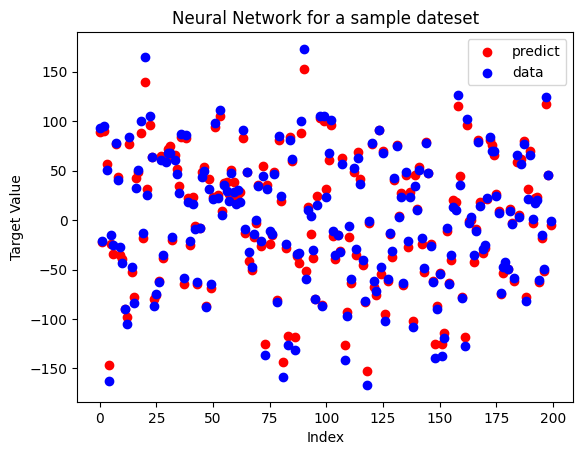

In [10]:
plt.scatter(range(len(y_predict)), y_predict, color="red", label="predict")
plt.scatter(range(len(y_predict)), y_test, color="blue", label="data")
plt.title("Neural Network for a sample dateset")
plt.ylabel("Target Value")
plt.xlabel("Index")
plt.legend(loc="best")

# Classification

## Data

In [11]:
from keras.datasets import fashion_mnist

print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

In [12]:
class_name = {
       0: "T-shirt/top", 
       1: "Trouser",     
       2: "Pullover",    
       3: "Dress",       
       4: "Coat",        
       5: "Sandal",      
       6: "Shirt",      
       7: "Sneaker",     
       8: "Bag",         
       9: "Ankle boot",  
}

### Train Test Split

In [13]:
import requests
import gzip
import numpy as np

#(x_train, y_traina), (x_test, y_test) = fashion_mnist.load_data()

def load_images_from_gzip(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
        return data

def load_labels_from_gzip(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

# Load dataset
x_train = load_images_from_gzip('./fashion_mnist_dataset/train-images-idx3-ubyte.gz')
y_train = load_labels_from_gzip('./fashion_mnist_dataset/train-labels-idx1-ubyte.gz')
x_test = load_images_from_gzip('./fashion_mnist_dataset/t10k-images-idx3-ubyte.gz')
y_test = load_labels_from_gzip('./fashion_mnist_dataset/t10k-labels-idx1-ubyte.gz')

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Data Example

label:  9
class name:  Ankle boot


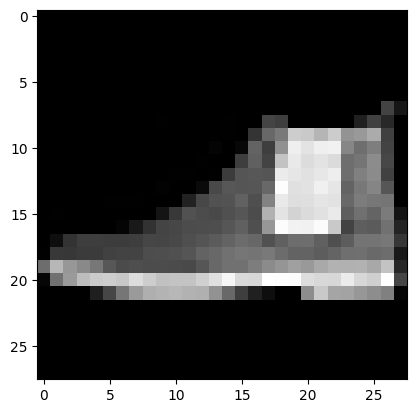

In [14]:
index = 111
plt.imshow(x_train[index], cmap="gray")
print("label: ", y_train[index])
print("class name: ", class_name[y_train[index]])

### Normalizing Data

In [15]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

### One-hot

In [16]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model

In [17]:
from keras.layers import Flatten

model = Sequential()

# input layer:
model.add(Input((28, 28)))
# flatten:
model.add(Flatten())
# dense 1:
model.add(Dense(units=128, activation="relu"))
# dense 2:
model.add(Dense(units=128, activation="relu"))
# output layer:
model.add(Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [18]:
loss = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy()

model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=50)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.7609 - loss: 0.6844 - val_categorical_accuracy: 0.8503 - val_loss: 0.4290
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8594 - loss: 0.3870 - val_categorical_accuracy: 0.8560 - val_loss: 0.3970
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8703 - loss: 0.3498 - val_categorical_accuracy: 0.8801 - val_loss: 0.3374
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.8858 - loss: 0.3127 - val_categorical_accuracy: 0.8744 - val_loss: 0.3446
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - categorical_accuracy: 0.8916 - loss: 0.2931 - val_categorical_accuracy: 0.8837 - val_loss: 0.3371
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.8977 - loss: 0.2772 - val_categorical_accuracy: 0.8749 - val_loss: 0.3529
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.9005 - los

### Evaluation

#### Train

In [19]:
model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9755 - loss: 0.0690


[0.15920202434062958, 0.9612333178520203]

### Test

In [20]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.8876 - loss: 0.6223


[0.6238036155700684, 0.8878999948501587]

model is overfitted!

### Prediction Example

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
True:  Sandal
Predict:  Sandal


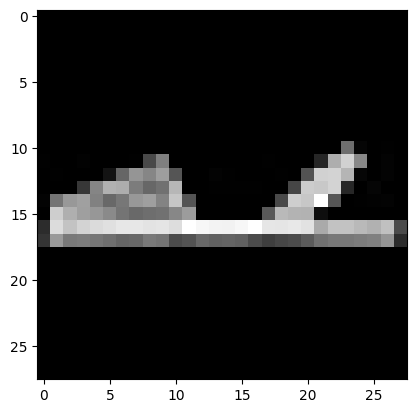

In [21]:
y_predict = model.predict(x_test)

index = 111
plt.imshow(x_test[index], cmap="gray")
print("True: ", class_name[y_test[index].argmax()])
print("Predict: ", class_name[y_predict[index].argmax()])

# Convolutioanal Neural Network

## Data 

Same as previous section:

### Train Test Split

In [22]:
x_train = load_images_from_gzip('./fashion_mnist_dataset/train-images-idx3-ubyte.gz')
y_train = load_labels_from_gzip('./fashion_mnist_dataset/train-labels-idx1-ubyte.gz')
x_test = load_images_from_gzip('./fashion_mnist_dataset/t10k-images-idx3-ubyte.gz')
y_test = load_labels_from_gzip('./fashion_mnist_dataset/t10k-labels-idx1-ubyte.gz')

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Normalization

In [23]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

### One-hot

In [24]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


## Model

In [25]:
from keras.layers import Conv2D, MaxPool2D

model = Sequential()

# input layer:
model.add(Input((28, 28, 1)))
# conv 1:
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation="relu", padding="same"))
# maxpool:
model.add(MaxPool2D())
# conv 2:
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation="relu", padding="same"))
# maxpool:
model.add(MaxPool2D())
# conv 1:
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation="relu", padding="same"))
# faltten:
model.add(Flatten())
# dense:
model.add(Dense(units=128, activation="relu"))
# output layer:
model.add(Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426,122 (1.63 MB)

 Trainable params: 426,122 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [26]:
loss = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy()
model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=50)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - categorical_accuracy: 0.7646 - loss: 0.6564 - val_categorical_accuracy: 0.8810 - val_loss: 0.3325
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - categorical_accuracy: 0.8909 - loss: 0.3084 - val_categorical_accuracy: 0.9037 - val_loss: 0.2677
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - categorical_accuracy: 0.9074 - loss: 0.2512 - val_categorical_accuracy: 0.9143 - val_loss: 0.2405
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - categorical_accuracy: 0.9216 - loss: 0.2153 - val_categorical_accuracy: 0.9096 - val_loss: 0.2427
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - categorical_accuracy: 0.9328 - loss: 0.1840 - val_categorical_accuracy: 0.9169 - val_loss: 0.2250
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - categorical_accuracy: 0.9421 - loss: 0.1566 - val_categorical_accuracy: 0.9131 - val_loss: 0.2404
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - categorical_accuracy

### Prediction Example

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
True:  Sandal
Predict:  Sandal


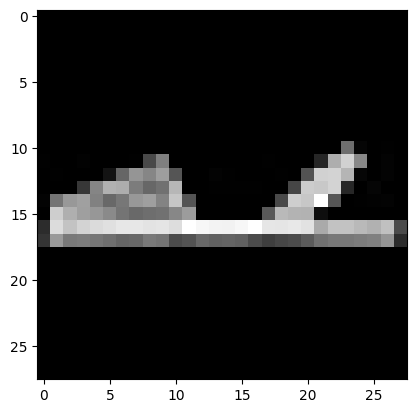

In [27]:
y_predict = model.predict(x_test)

index = 111
plt.imshow(x_test[index], cmap="gray")
print("True: ", class_name[y_test[index].argmax()])
print("Predict: ", class_name[y_predict[index].argmax()])